# Ejercicio 1
## Correlacion, Residuos Aplicando Cuadro **ANOVA**

Se cuenta con información de una muestra de 10 fondos de inversión, respecto a su rentabilidad porcentual para un periodo de doce meses y el activo total (en millones de $). Los datos se presentan en la siguiente tabla. 

Pruebe, con un nivel de significancia de 5%, si existe la relación lineal entre el activo total y la rentabilidad (Anova).

![s8Ej1](../Images/S8EJ1.png)

**Paso 1.** Planteo de Hipótesis:

$H_0:\beta_1 = 0$ (No hay relación lineal entre X e Y)

$H_0:\beta_1 \neq 0$ (Si hay relación lineal entre X e Y)

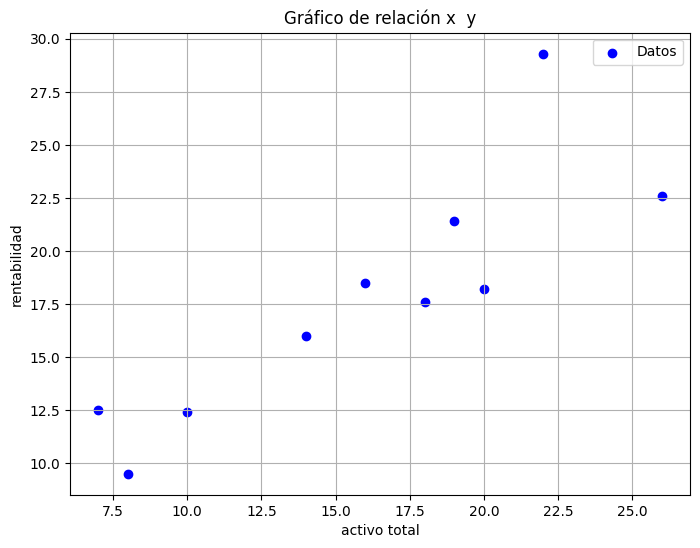

,X,Yi,Yi=B0+B1X,SCR,SCE
0,22,29.3,22.5844,22.8905,45.0993
1,18,17.6,19.3948,2.5434,3.2213
2,14,16.0,16.2052,2.5434,0.0421
3,8,9.5,11.4208,40.6942,3.6895
4,26,22.6,25.7740,63.5847,10.0743
5,10,12.4,13.0156,22.8905,0.3790
6,16,18.5,17.8000,0.0000,0.4900
7,19,21.4,20.1922,5.7226,1.4588
8,20,18.2,20.9896,10.1735,7.7819
9,7,12.5,10.6234,51.5036,3.5216


Media Yi= 17.8

SCT = 222.5464 + 75.7578  = 298.304


,GL,SC,CM,FC,FTAB
Regresion,1,222.5464,222.546400,23.5008,5.3177
Residual(Error),8,75.7578,9.469725,0.0000,0.0000
Total,n-1,298.3040,0.000000,0.0000,0.0000


Conlusión: Con un nivel de significancia del 5.0 % se rechaza la Hipotesis nula . Por lo tanto, se concluye que si 
existe relacion lineal entre activo total y rentabilidad


In [3]:
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import f
import math
import pandas as pd

# Datos
#pregunta= "¿Cuánto en Promedio recibirá de propina un moso que se ha demorado en atender 3.5 minutos?"
#VariableX = 3.5
x = [22,18,14,8,26,10,16,19,20,7]
TextX = "activo total"
y = [29.3,17.6,16,9.5,22.6,12.4,18.5,21.4,18.2,12.5]
TextY = "rentabilidad"
a = 0.05
n = len(x)

#------------------------------------------------
# Creacion y muestra en pantalla del grafico
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Datos')
# Personalizar el gráfico
plt.title('Gráfico de relación x  y')
plt.xlabel(TextX)
plt.ylabel(TextY)
plt.grid(True)
plt.legend()
# Mostrar el gráfico
plt.show()
#-----------------------------------------------

# Calculo x*y | x^2 | y^2
xy=[]
x2=[]
y2=[]
for posC,numero in enumerate(x):
    valorXY = numero*y[posC]
    valorX2 = numero**2
    valorY2 = y[posC]**2
    xy.append(valorXY)
    x2.append(valorX2)
    y2.append(valorY2)

# CALCULO DE COEFICIENTES PRACTICO
# PASO 1.
NuB1 = (n*sum(xy))-(sum(x)*sum(y))
DeNB1 = (n*sum(x2))-(sum(x)**2)
B1 = round(NuB1/DeNB1,4)
#print("\nPASO 1\nB1 =",NuB1,"/",DeNB1," =",B1)

# PASO 2.
NuB0 = (sum(y)-B1*sum(x))
B0 = round(NuB0/n,4)
#print("\nPASO 2\nB0 =",NuB0,"/",n," =",B0)

# Calculamos Y=B0+B1X
yBoB1X = []
for posC,numero in enumerate(x):
    valor = round(B0+B1*numero,4)
    yBoB1X.append(valor)
promedioyBoB1X = sum(yBoB1X)/n

# Calculamos SCR
Scr = []
for posC,numero in enumerate(yBoB1X):
    valor = round((numero-promedioyBoB1X)**2,4)
    Scr.append(valor)

# Calculamos SCE
Sce = []
for posC,numero in enumerate(yBoB1X):
    valor = round((numero-y[posC])**2,4)
    Sce.append(valor)

# Crear un DataFrame 
Tabla1 = {
    'X': x+[sum(x)],
    'Yi': y+[sum(y)],
    'Yi=B0+B1X': yBoB1X+[sum(yBoB1X)],
    'SCR': Scr+[sum(Scr)],   
    'SCE': Sce+[sum(Sce)]  
}
df = pd.DataFrame(Tabla1)
df = df.rename(index={10:'TOTAL'})

# Mostrar el DataFrame
display(df)

# Calculamos SCT
Sct = round(sum(Scr)+sum(Sce),3)

print("Media Yi=",promedioyBoB1X)
print("\nSCT =",sum(Scr),"+",sum(Sce)," =",Sct)

# ------------------Cuadro ANOVA------------------------
ResidualEror = n-2
cmREror = sum(Sce)/ResidualEror
Fc = round((sum(Scr)/1)/(sum(Sce)/(n-2)),4)
Ft = round(f.ppf(1-a,1,n-2),4)

Anova = {
    'GL': [1,ResidualEror,'n-1'],
    'SC': [sum(Scr), sum(Sce),Sct],
    'CM': [sum(Scr), cmREror, 0],  
    'FC': [Fc, 0, 0],   
    'FTAB': [Ft, 0, 0]  
}
tablaAnova = pd.DataFrame(Anova, index=['Regresion', 'Residual(Error)', 'Total'])
# Mostrar el DataFrame
display(tablaAnova)

# Conclusion
conclusion=""
sn = ""
if Fc>Ft:
    conclusion="se rechaza la Hipotesis nula"
    sn="si"
else:
    conclusion="se acepta la Hipotesis nula"
    sn = "no"
    
print("Conlusión: Con un nivel de significancia del",a*100,"%",conclusion,". Por lo tanto, se concluye que",sn,"\nexiste relacion lineal entre",TextX,"y",TextY)



# Ejercicio 2:
Calcular la varianza residual con los datos del ejercicio anterior.

![s8Ej1](../Images/S8EJ1.png)

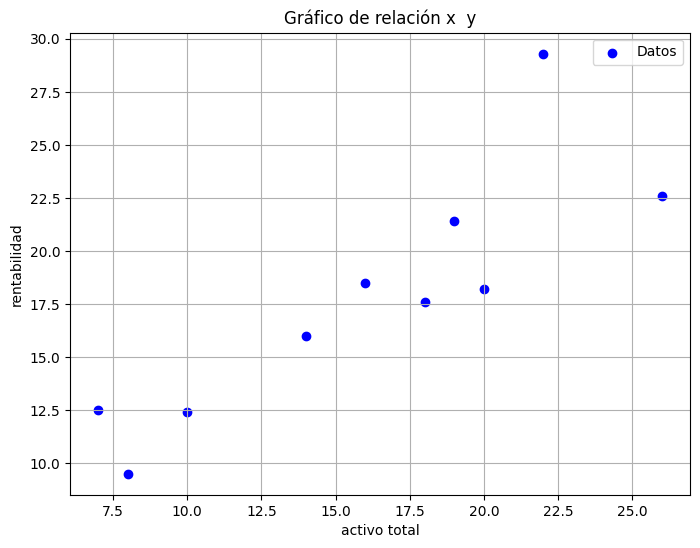

,X,Yi,Yi=B0+B1X,e_i
0,22,29.3,22.5844,6.7156
1,18,17.6,19.3948,-1.7948
2,14,16.0,16.2052,-0.2052
3,8,9.5,11.4208,-1.9208
4,26,22.6,25.7740,-3.1740
5,10,12.4,13.0156,-0.6156
6,16,18.5,17.8000,0.7000
7,19,21.4,20.1922,1.2078
8,20,18.2,20.9896,-2.7896
9,7,12.5,10.6234,1.8766


Ecuacion de Pronostico
Y = 5.0416 + 0.7974 X

Varianza Residual (S^2_r) = 75.7577 / 10 - 2 = 9.4697


In [33]:
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import f
import math
import pandas as pd

# Datos
#pregunta= "¿Cuánto en Promedio recibirá de propina un moso que se ha demorado en atender 3.5 minutos?"
#VariableX = 3.5
x = [22,18,14,8,26,10,16,19,20,7]
TextX = "activo total"
y = [29.3,17.6,16,9.5,22.6,12.4,18.5,21.4,18.2,12.5]
TextY = "rentabilidad"
a = 0.05
n = len(x)

#------------------------------------------------
# Creacion y muestra en pantalla del grafico
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Datos')
# Personalizar el gráfico
plt.title('Gráfico de relación x  y')
plt.xlabel(TextX)
plt.ylabel(TextY)
plt.grid(True)
plt.legend()
# Mostrar el gráfico
plt.show()
#-----------------------------------------------

# Calculo x*y | x^2 | y^2
xy=[]
x2=[]
y2=[]
for posC,numero in enumerate(x):
    valorXY = numero*y[posC]
    valorX2 = numero**2
    valorY2 = y[posC]**2
    xy.append(valorXY)
    x2.append(valorX2)
    y2.append(valorY2)

# CALCULO DE COEFICIENTES PRACTICO
# PASO 1.
NuB1 = (n*sum(xy))-(sum(x)*sum(y))
DeNB1 = (n*sum(x2))-(sum(x)**2)
B1 = round(NuB1/DeNB1,4)
#print("\nPASO 1\nB1 =",NuB1,"/",DeNB1," =",B1)

# PASO 2.
NuB0 = (sum(y)-B1*sum(x))
B0 = round(NuB0/n,4)
#print("\nPASO 2\nB0 =",NuB0,"/",n," =",B0)

# Calculamos Y=B0+B1X
yBoB1X = []
for posC,numero in enumerate(x):
    valor = round(B0+B1*numero,4)
    yBoB1X.append(valor)
promedioyBoB1X = sum(yBoB1X)/n

# Calculamos ei
e_i=[]
sumaEi=0
sumaEi2=0
for posC,numero in enumerate(y):
    valor1 = numero - yBoB1X[posC]
    e_i.append(round(valor1,4))
    sumaEi += abs(valor1)
    sumaEi2 += abs(valor1)**2

# Calculo S_r^2
S2r = round(sumaEi2/(n-2),4)

# Crear un DataFrame
Tabla1 = {
    'X': x+[sum(x)],
    'Yi': y+[sum(y)],
    'Yi=B0+B1X': yBoB1X+[sum(yBoB1X)],
    'e_i': e_i+[sumaEi],   
}
df = pd.DataFrame(Tabla1)
df = df.rename(index={10:'TOTAL'})
# Mostrar el DataFrame
display(df)

print("Ecuacion de Pronostico\nY =",B0,"+",B1,"X")
print("\nVarianza Residual (S^2_r) =",round(sumaEi2,4),"/",n,"- 2 =",S2r)
